# **Wikipedia: blocking of users and policies**


## Library Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import matplotlib.gridspec as gridspec
# import json
import datetime as dt
import scipy.stats as stat
import seaborn as sns
from sklearn import preprocessing


# setting plotting parameters
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

# **Part A:** Reading, cleaning and processing original data to our needs

In [4]:
# setting up the working directory in local machine 

folder = "D:\LPI\Open Science\Wikipedia_2022\data_original"
folder_result = "D:\LPI\Open Science\Wikipedia_2022\data_results"


### **1. Reading the freq_policies_monthly.csv file and seeing the data**

In [5]:
file = '/freq_policies_monthly.csv'
freq_policies_monthly = pd.read_csv(folder + file)
freq_policies_monthly['month'] = pd.to_datetime(freq_policies_monthly['month']) 
print(freq_policies_monthly.shape)
freq_policies_monthly.head()

(215, 2)


,month,nb_policies
0,2005-01-01,28
1,2005-02-01,28
2,2005-03-01,28
3,2005-04-01,29
4,2005-05-01,29


### **2. Reading the MonthlyEditAndEditorsFrom2004-2017.csv' file and cleaning**

In [6]:
file = '/MonthlyEditAndEditorsFrom2004-2017.csv'
df_edit_editors_04_07 = pd.read_csv(folder + file)
# df_edit_editors_04_07['month'] == pd.to_datetime(df_edit_editors_04_07['month'])
print(df_edit_editors_04_07.shape)
df_edit_editors_04_07.head()



(168, 3)


,month,edits,editors
0,2004-01-01T00:00:00.000Z,218853,14858
1,2004-02-01T00:00:00.000Z,310206,19883
2,2004-03-01T00:00:00.000Z,440685,26881
3,2004-04-01T00:00:00.000Z,405181,26519
4,2004-05-01T00:00:00.000Z,420408,28361


In [7]:
# checkingg if there are NaN values
nan_count = df_edit_editors_04_07['editors'].isnull().sum()
nan_count

0

In [8]:
# Now we are designing the MonthlyEditAndEditorsFrom2004-2017.csv data to our needs

# cleaning month column to have proper format
df_edit_editors_04_07['month'] = pd.to_datetime(df_edit_editors_04_07['month'])

print(df_edit_editors_04_07.shape)

# keeping only values from 2005 and onwards
df_edit_editors_04_07 = df_edit_editors_04_07[df_edit_editors_04_07['month'] >= '2005-01-01']

# converting back to date format 
df_edit_editors_04_07['month'] = df_edit_editors_04_07['month'].dt.date

# resetting the windows so starts at 0
df_edit_editors_04_07.reset_index(drop=True, inplace=True)

print(df_edit_editors_04_07.shape)

df_edit_editors_04_07.tail()
# plt.plot(df_edit_editors_04_07['month'],df_edit_editors_04_07['edits'])

(168, 3)
(156, 3)


,month,edits,editors
151,2017-08-01,4686591,399409
152,2017-09-01,4666223,398494
153,2017-10-01,4696462,436203
154,2017-11-01,4622820,434451
155,2017-12-01,4797589,409054


### **3. Reading the wikipedia_en_editors_filtered.csv file and cleaning**
1. We are only keeping values from Jan-2005 to Dec-2017 (Because the scraped data is until 2017)
2. Keeping the time in proper format
3. Other basic cleaning  

In [9]:
file = '/wikipedia_en_editors_filtered.csv'
df_editors_filtered= pd.read_csv(folder + file)

print(df_editors_filtered.shape)
df_editors_filtered.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_editors_filtered.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,44,66,NaN,NaN
1,2001-02-01T00:00:00.000Z,24,45,NaN,NaN
2,2001-03-01T00:00:00.000Z,88,79,NaN,NaN
3,2001-04-01T00:00:00.000Z,64,44,NaN,NaN
4,2001-05-01T00:00:00.000Z,85,58,NaN,NaN


In [10]:
# identifying which columns have NaN values
nan_count = df_editors_filtered.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_editors_filtered['total.name-bot'].fillna(0, inplace=True)
df_editors_filtered['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_editors_filtered.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [11]:
# cleaning month column to have proper format
df_editors_filtered['month'] = pd.to_datetime(df_editors_filtered['month'])

print(df_editors_filtered.shape)

# keeping only values from 2005 and 2017
df_editors_filtered = df_editors_filtered[df_editors_filtered['month'] >= '2005-01-01']
df_editors_filtered = df_editors_filtered[df_editors_filtered['month'] <= '2017-12-31']

# converting back to date format 
df_editors_filtered['month'] = df_editors_filtered['month'].dt.date

# resetting the windows so starts at 0
df_editors_filtered.reset_index(drop=True, inplace=True)

print(df_editors_filtered.shape)

df_editors_filtered.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_editors_filtered['month'],df_editors_filtered['total.anonymous'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,65476,14694,18.0,2.0
1,2005-02-01,60723,15056,28.0,2.0
2,2005-03-01,74055,18243,29.0,2.0
3,2005-04-01,92101,21373,31.0,2.0
4,2005-05-01,102733,23181,35.0,4.0


### **4. Reading the wikipedia_en_active_editors.csv file and cleaning**

In [12]:
file = '/wikipedia_en_active_editors.csv'
df_active_editors= pd.read_csv(folder + file)
print(df_active_editors.shape)
df_active_editors.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_active_editors.head()

(276, 4)


,month,total.total
0,2001-01-01T00:00:00.000Z,17
1,2001-02-01T00:00:00.000Z,20
2,2001-03-01T00:00:00.000Z,35
3,2001-04-01T00:00:00.000Z,26
4,2001-05-01T00:00:00.000Z,31


In [13]:
# identifying which columns have NaN values
nan_count = df_active_editors.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_active_editors['total.total'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_active_editors.isnull().sum()
print("After replacement: \n" ,nan_count)

month          0
total.total    0
dtype: int64
After replacement: 
 month          0
total.total    0
dtype: int64


In [14]:
# cleaning month column to have proper format
df_active_editors['month'] = pd.to_datetime(df_active_editors['month'])

print(df_active_editors.shape)

# keeping only values from 2005 and 2017
df_active_editors = df_active_editors[df_active_editors['month'] >= '2005-01-01']
df_active_editors = df_active_editors[df_active_editors['month'] <= '2017-12-31']

# converting back to date format 
df_active_editors['month'] = df_active_editors['month'].dt.date

# resetting the windows so starts at 0
df_active_editors.reset_index(drop=True, inplace=True)

print(df_active_editors.shape)

df_active_editors.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_active_editors['month'],df_active_editors['total.total'])

(276, 2)
(156, 2)


,month,total.total
0,2005-01-01,6871
1,2005-02-01,6872
2,2005-03-01,8543
3,2005-04-01,10039
4,2005-05-01,10911


### **5. Reading the wikipedia_en_edits_filtered.csv file and cleaning**

In [15]:
file = '/wikipedia_en_edits_filtered.csv'
df_edits_filtered = pd.read_csv(folder + file)
print(df_edits_filtered.shape)
df_edits_filtered.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edits_filtered.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,95,440,NaN,NaN
1,2001-02-01T00:00:00.000Z,144,803,NaN,NaN
2,2001-03-01T00:00:00.000Z,429,1367,NaN,NaN
3,2001-04-01T00:00:00.000Z,231,958,NaN,NaN
4,2001-05-01T00:00:00.000Z,342,2028,NaN,NaN


In [16]:
# identifying which columns have NaN values
nan_count = df_edits_filtered.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_edits_filtered['total.name-bot'].fillna(0, inplace=True)
df_edits_filtered['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_edits_filtered.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [17]:
# cleaning month column to have proper format
df_edits_filtered['month'] = pd.to_datetime(df_edits_filtered['month'])

print(df_edits_filtered.shape)

# keeping only values from 2005 and 2017
df_edits_filtered = df_edits_filtered[df_edits_filtered['month'] >= '2005-01-01']
df_edits_filtered = df_edits_filtered[df_edits_filtered['month'] <= '2017-12-31']

# converting back to date format 
df_edits_filtered['month'] = df_edits_filtered['month'].dt.date

# resetting the windows so starts at 0
df_edits_filtered.reset_index(drop=True, inplace=True)

print(df_edits_filtered.shape)

df_edits_filtered.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edits_filtered['month'],df_edits_filtered['total.user'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,199826,594798,1923.0,3160.0
1,2005-02-01,193228,592628,2128.0,1364.0
2,2005-03-01,242362,770234,9740.0,1728.0
3,2005-04-01,329974,929123,29911.0,4866.0
4,2005-05-01,365311,969462,24931.0,4664.0


### **6. Reading the wikipedia_en_edited_pages.csv file and cleaning**

In [18]:
file = '/wikipedia_en_edited_pages.csv'
df_edited_pages = pd.read_csv(folder + file)
print(df_edited_pages.shape)
df_edited_pages.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edited_pages.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,18,53,NaN,NaN
1,2001-02-01T00:00:00.000Z,26,161,NaN,NaN
2,2001-03-01T00:00:00.000Z,191,492,NaN,NaN
3,2001-04-01T00:00:00.000Z,111,584,NaN,NaN
4,2001-05-01T00:00:00.000Z,205,1274,NaN,NaN


In [19]:
# identifying which columns have NaN values
nan_count = df_edited_pages.isnull().sum()
print(nan_count)

# Replacing NaN values with 0
df_edited_pages['total.name-bot'].fillna(0, inplace=True)
df_edited_pages['total.group-bot'].fillna(0, inplace=True)

# checking if there are yet any NaN values
nan_count = df_edited_pages.isnull().sum()
print("After replacement: \n" ,nan_count)

month               0
total.anonymous     0
total.user          0
total.name-bot     23
total.group-bot    38
dtype: int64
After replacement: 
 month              0
total.anonymous    0
total.user         0
total.name-bot     0
total.group-bot    0
dtype: int64


In [20]:
# cleaning month column to have proper format
df_edited_pages['month'] = pd.to_datetime(df_edited_pages['month'])

print(df_edited_pages.shape)

# keeping only values from 2005 and 2017
df_edited_pages = df_edited_pages[df_edited_pages['month'] >= '2005-01-01']
df_edited_pages = df_edited_pages[df_edited_pages['month'] <= '2017-12-31']

# converting back to date format 
df_edited_pages['month'] = df_edited_pages['month'].dt.date

# resetting the windows so starts at 0
df_edited_pages.reset_index(drop=True, inplace=True)

print(df_edited_pages.shape)

df_edited_pages.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edited_pages['month'],df_edited_pages['total.user'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,66918,175598,1268.0,2970.0
1,2005-02-01,66906,176741,1538.0,1205.0
2,2005-03-01,81284,219188,4975.0,1618.0
3,2005-04-01,99532,250281,22458.0,4557.0
4,2005-05-01,109594,261928,18046.0,3975.0


### **7. Reading the wikipedia_en_edited_pages_conoc.csv file and cleaning**

In [21]:
file = '/wikipedia_en_edited_pages_conoc.csv'
df_edited_pages_conoc = pd.read_csv(folder + file)
print(df_edited_pages_conoc.shape)
df_edited_pages_conoc.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_edited_pages_conoc.head()

(276, 5)


,month,total.non-content,total.content
0,2001-01-01T00:00:00.000Z,28,38
1,2001-02-01T00:00:00.000Z,29,148
2,2001-03-01T00:00:00.000Z,89,510
3,2001-04-01T00:00:00.000Z,51,604
4,2001-05-01T00:00:00.000Z,71,1351


In [22]:
# cleaning month column to have proper format
df_edited_pages_conoc['month'] = pd.to_datetime(df_edited_pages_conoc['month'])

print(df_edited_pages_conoc.shape)

# keeping only values from 2005 and 2017
df_edited_pages_conoc = df_edited_pages_conoc[df_edited_pages_conoc['month'] >= '2005-01-01']
df_edited_pages_conoc = df_edited_pages_conoc[df_edited_pages_conoc['month'] <= '2017-12-31']

# converting back to date format 
df_edited_pages_conoc['month'] = df_edited_pages_conoc['month'].dt.date

# resetting the windows so starts at 0
df_edited_pages_conoc.reset_index(drop=True, inplace=True)

print(df_edited_pages_conoc.shape)

df_edited_pages_conoc.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_edited_pages_conoc['month'],df_edited_pages_conoc['total.non-content'])
# plt.plot(df_edited_pages_conoc['month'],df_edited_pages_conoc['total.content'])

(276, 3)
(156, 3)


,month,total.non-content,total.content
0,2005-01-01,38977,162240
1,2005-02-01,39771,161811
2,2005-03-01,49885,198997
3,2005-04-01,59181,233517
4,2005-05-01,62047,245289


### **8. Reading the wikipedia_en_page_views.csv file and cleaning**
(FOR NOW SKIPPING THIS DATAFRAME, NOT ENOUGH DATA)

In [23]:
file = '/wikipedia_en_page_views.csv'
df_page_views = pd.read_csv(folder + file)
print(df_page_views.shape)
df_page_views.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_page_views.head()

(96, 6)


,month,total.mobile-web,total.mobile-app,total.desktop
0,2016-01-01T00:00:00.000Z,3722494664,106432770,5501942159
1,2016-02-01T00:00:00.000Z,3336997265,92414138,5254955971
2,2016-03-01T00:00:00.000Z,3421694873,97899085,5283017698
3,2016-04-01T00:00:00.000Z,3306862507,81719005,5544327061
4,2016-05-01T00:00:00.000Z,3404277806,98738514,5313329373


In [24]:
# cleaning month column to have proper format
df_page_views['month'] = pd.to_datetime(df_page_views['month'])

print(df_page_views.shape)

# keeping only values from 2005 and 2017
df_page_views = df_page_views[df_page_views['month'] >= '2005-01-01']
df_page_views = df_page_views[df_page_views['month'] <= '2017-12-31']

# converting back to date format 
df_page_views['month'] = df_page_views['month'].dt.date

# resetting the windows so starts at 0
df_page_views.reset_index(drop=True, inplace=True)

print(df_page_views.shape)

df_page_views.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_page_views['month'],df_page_views['total.mobile-web'])

(96, 4)
(24, 4)


,month,total.mobile-web,total.mobile-app,total.desktop
0,2016-01-01,3722494664,106432770,5501942159
1,2016-02-01,3336997265,92414138,5254955971
2,2016-03-01,3421694873,97899085,5283017698
3,2016-04-01,3306862507,81719005,5544327061
4,2016-05-01,3404277806,98738514,5313329373


### **9. Reading the wikipedia_en_page_views_legacy.csv file and cleaning**

(FOR NOW SKIPPING THIS DATAFRAME, NOT ENOUGH DATA)

In [25]:
file = '/wikipedia_en_page_views_legacy.csv'
df_page_views_legacy = pd.read_csv(folder + file)
print(df_page_views_legacy.shape)
df_page_views_legacy.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_page_views_legacy.head()

(105, 4)


,month,total.total
0,2007-12-01T00:00:00.000Z,2998331524
1,2008-01-01T00:00:00.000Z,4930902570
2,2008-02-01T00:00:00.000Z,4818393763
3,2008-03-01T00:00:00.000Z,4955405809
4,2008-04-01T00:00:00.000Z,5159162183


In [26]:
# cleaning month column to have proper format
df_page_views_legacy['month'] = pd.to_datetime(df_page_views_legacy['month'])

print(df_page_views_legacy.shape)

# keeping only values from 2005 and 2017
df_page_views_legacy = df_page_views_legacy[df_page_views_legacy['month'] >= '2005-01-01']
df_page_views_legacy = df_page_views_legacy[df_page_views_legacy['month'] <= '2017-12-31']

# converting back to date format 
df_page_views_legacy['month'] = df_page_views_legacy['month'].dt.date

# resetting the windows so starts at 0
df_page_views_legacy.reset_index(drop=True, inplace=True)

print(df_page_views_legacy.shape)

df_page_views_legacy.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_page_views_legacy['month'],df_page_views_legacy['total.total'])

(105, 2)
(105, 2)


,month,total.total
0,2007-12-01,2998331524
1,2008-01-01,4930902570
2,2008-02-01,4818393763
3,2008-03-01,4955405809
4,2008-04-01,5159162183


### **10. Reading the wikipedia_en_pages2date.csv file and cleaning**

In [27]:
file = '/wikipedia_en_pages2date.csv'
df_pages2date= pd.read_csv(folder + file)
print(df_pages2date.shape)
df_pages2date.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_pages2date.head()

(276, 5)


,month,total.non-content,total.content
0,2001-01-01T00:00:00.000Z,28,38
1,2001-02-01T00:00:00.000Z,51,178
2,2001-03-01T00:00:00.000Z,127,630
3,2001-04-01T00:00:00.000Z,172,1197
4,2001-05-01T00:00:00.000Z,230,2437


In [28]:
# cleaning month column to have proper format
df_pages2date['month'] = pd.to_datetime(df_pages2date['month'])

print(df_pages2date.shape)

# keeping only values from 2005 and 2017
df_pages2date = df_pages2date[df_pages2date['month'] >= '2005-01-01']
df_pages2date = df_pages2date[df_pages2date['month'] <= '2017-12-31']

# converting back to date format 
df_pages2date['month'] = df_pages2date['month'].dt.date

# resetting the windows so starts at 0
df_pages2date.reset_index(drop=True, inplace=True)

print(df_pages2date.shape)

df_pages2date.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_pages2date['month'],df_pages2date['total.content'])

(276, 3)
(156, 3)


,month,total.non-content,total.content
0,2005-01-01,230161,436782
1,2005-02-01,249240,456399
2,2005-03-01,274441,481853
3,2005-04-01,304580,511374
4,2005-05-01,333642,541295


### **11.Reading the wikipedia_en_new_pages.csv file and cleaing**

In [29]:
file = '/wikipedia_en_new_pages.csv'
df_new_pages= pd.read_csv(folder + file)
print(df_new_pages.shape)
df_new_pages.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_new_pages.head()

(276, 7)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2001-01-01T00:00:00.000Z,14,52,NaN,NaN
1,2001-02-01T00:00:00.000Z,17,146,NaN,NaN
2,2001-03-01T00:00:00.000Z,141,387,NaN,NaN
3,2001-04-01T00:00:00.000Z,83,529,NaN,NaN
4,2001-05-01T00:00:00.000Z,163,1135,NaN,NaN


In [30]:
# cleaning month column to have proper format
df_new_pages['month'] = pd.to_datetime(df_new_pages['month'])

print(df_new_pages.shape)

# keeping only values from 2005 and 2017
df_new_pages = df_new_pages[df_new_pages['month'] >= '2005-01-01']
df_new_pages = df_new_pages[df_new_pages['month'] <= '2017-12-31']

# converting back to date format 
df_new_pages['month'] = df_new_pages['month'].dt.date

# resetting the windows so starts at 0
df_new_pages.reset_index(drop=True, inplace=True)

print(df_new_pages.shape)

# getting rid of nan values
df_new_pages['total.group-bot'].fillna(0, inplace=True)
df_new_pages.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_new_pages['month'],df_new_pages['total.content'])

(276, 5)
(156, 5)


,month,total.anonymous,total.user,total.name-bot,total.group-bot
0,2005-01-01,7756,32798,24.0,0.0
1,2005-02-01,7144,31538,14.0,0.0
2,2005-03-01,9471,40994,190.0,0.0
3,2005-04-01,11297,47379,982.0,2.0
4,2005-05-01,12989,45811,180.0,3.0


### **12.Reading the wikipedia_en_new_reg.csv file and cleaing**

In [31]:
file = '/wikipedia_en_new_reg.csv'
df_new_reg= pd.read_csv(folder + file)
print(df_new_reg.shape)
df_new_reg.drop(columns=['timeRange.start', 'timeRange.end'], inplace=True)
df_new_reg.head()

(259, 4)


,month,total.total
0,2001-01-01T00:00:00.000Z,5
1,2001-02-01T00:00:00.000Z,2
2,2001-03-01T00:00:00.000Z,7
3,2001-05-01T00:00:00.000Z,8
4,2001-06-01T00:00:00.000Z,3


In [32]:
# cleaning month column to have proper format
df_new_reg['month'] = pd.to_datetime(df_new_reg['month'])

print(df_new_reg.shape)

# keeping only values from 2005 and 2017
df_new_reg = df_new_reg[df_new_reg['month'] >= '2005-01-01']
df_new_reg = df_new_reg[df_new_reg['month'] <= '2017-12-31']

# converting back to date format 
df_new_reg['month'] = df_new_reg['month'].dt.date

# resetting the windows so starts at 0
df_new_reg.reset_index(drop=True, inplace=True)

print(df_new_reg.shape)

# getting rid of nan values
# df_new_reg['total.group-bot'].fillna(0, inplace=True)
df_new_reg.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_new_reg['month'],df_new_reg['total.total'])

(259, 2)
(156, 2)


,month,total.total
0,2005-01-01,2
1,2005-02-01,5
2,2005-03-01,11
3,2005-04-01,13
4,2005-05-01,7


### **13.Reading the block_log_data_cleaned.csv file and cleaing a column**
(The old scraped data)

In [33]:
file = '/block_log_data_cleaned.csv' 
df = pd.read_csv(folder + file)

print(df.shape)
df['timestamp'] = pd.to_datetime(df['timestamp'])

(4202626, 8)


In [34]:
df.head()

,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
1,#13255,unblock,Angela,2004-12-23,me,NaN,NaN,NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN


In [35]:
df.describe()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,title,action,user,timestamp,comment,duration,flags,expiry
count,4202381,4202626,4202626,4202626,4202626,4136379,4136379,3298853
unique,3692933,3,1959,4323,369989,19050,34,2073255
top,ThisIsaTest,block,ProcseeBot,2013-10-29 00:00:00,{{blocked proxy}} <!-- 8080 -->,60 days,['nocreate'],2007-09-01T00:00:00Z
freq,597,4067771,2370014,12702,730464,1645505,3021835,520
first,NaN,NaN,NaN,2004-12-23 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN


**First glance at the scraped data** 

When we first conducted our analysis (Dec 2022) our original dataframe had:
- 8 columns: title, action, user, timestamp, comment, duration, flags, expiry
- 4202626 entries (years 2004 to 2017)
- first timestamp: 2004-12-23 00:00:00, last timestamp: 2017-12-31 00:00:00

We later removed the year 2004 which held to few data to be relevant.

**title** = the user being blocked

**action** = block or unblock - we will only focus on block

**user** = the person (administrator) implementing the block

**timestamp** = the block event date

**comment** = blocking rationale

**duration** = blocking scheduled duration

**flag** = mysterious information

**expiry** = sometimes, a timestamp

### **14.Reading the block_log_data_cleaned_scraped.csv file and cleaing a column**
(This data is scraped by Hao and I am skipping running these cells for now)

In [36]:
# file = '/block_log_cleaned_scraped.csv' 
# df_scraped = pd.read_csv(folder + file)

# print(df_scraped.shape)
# # df['timestamp'] = pd.to_datetime(df['timestamp'])
# df_scraped.head()

In [37]:
# df_scraped['action'].value_counts()

In [38]:
# # keeping only block events 
# df_blocked = df_scraped[df_scraped['action'] == 'block']

# # watching the shape after removing non-block rows 
# print(df_blocked.shape)
# df_blocked.head()

In [39]:
# # get unique titles
# df_blocked = df_blocked.groupby(pd.PeriodIndex(df_blocked['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
# print(df_blocked.shape)

# # resetting the index so indexing starts at 0
# df_blocked = df_blocked.reset_index()

# # converting the timestamp column in proper format
# df_blocked['timestamp'] = df_blocked['timestamp'].dt.to_timestamp()

# # changing the column name 
# df_blocked = df_blocked.rename(columns={"title": "blocked_people"})

# # updating monthly blocked dataframe by keeping values from 2005 and onwards
# df_blocked = df_blocked[df_blocked['timestamp'] >= '2005-01-01']

# # # resetting index so starts at 0
# df_blocked.reset_index(drop=True, inplace=True)

# # seeing data
# print(df_blocked.shape)
# df_blocked.tail()

# **Part B:** Relationship Analysis Between Features
## At first copying the dataframes of interest and summing appropriate columns 

### 1. Copying and summing df_editors_filtered dataframe

In [40]:
df_editors_filtered.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [41]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'editors.anonymous',
                   'total.user': 'editors.user',
                   'total.name-bot': 'editors.name-bot',
                   'total.group-bot': 'editors.group-bot'
                  }
editors = df_editors_filtered.copy()

# renaming the copied dataframe
editors.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
editors['editors.total'] = editors.sum(axis=1)
# editors.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 2. Copying and summing df_active_editors dataframe

In [42]:
df_active_editors.columns

Index(['month', 'total.total'], dtype='object')

In [43]:
# giving new unique columns names for better identification
new_columns_names={'total.total': 'active-editors.total'
                  }
active_editors = df_active_editors.copy()

# renaming the copied dataframe
active_editors.rename(columns=new_columns_names, inplace=True)
# active_editors.head()

### 3. Copying and summing df_edits_filtered dataframe

In [44]:
df_edits_filtered.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [45]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'edits.anonymous',
                   'total.user': 'edits.user',
                   'total.name-bot': 'edits.name-bot',
                   'total.group-bot': 'edits.group-bot'
                  }
edits = df_edits_filtered.copy()

# renaming the copied dataframe
edits.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edits['edits.total'] = edits.sum(axis=1)
# edits.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 4. Copying and summing df_new_reg dataframe

In [46]:
df_new_reg.columns

Index(['month', 'total.total'], dtype='object')

In [47]:
# giving new unique columns names for better identification
new_columns_names={'total.total': 'new-reg.total'
}

new_reg = df_new_reg.copy()

# renaming the copied dataframe
new_reg.rename(columns=new_columns_names, inplace=True)
# new_reg.head()

### 5. Copying and summing df_new_pages dataframe

In [48]:
df_new_pages.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [49]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'new-pages.anonymous',
                   'total.user': 'new-pages.user',
                   'total.name-bot': 'new-pages.name-bot',
                   'total.group-bot': 'new-pages.group-bot'
                  }
new_pages = df_new_pages.copy()

# renaming the copied dataframe
new_pages.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
new_pages['new-pages.total'] = new_pages.sum(axis=1)
# new_pages.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 6. Copying and summing df_edited_pages dataframe

In [50]:
df_edited_pages.columns

Index(['month', 'total.anonymous', 'total.user', 'total.name-bot',
       'total.group-bot'],
      dtype='object')

In [51]:
# giving new unique columns names for better identification
new_columns_names={'total.anonymous': 'edited-pages.anonymous',
                   'total.user': 'edited-pages.user',
                   'total.name-bot': 'edited-pages.name-bot',
                   'total.group-bot': 'edited-pages.group-bot'
                  }
edited_pages = df_edited_pages.copy()

# renaming the copied dataframe
edited_pages.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edited_pages['edited-pages.total'] = edited_pages.sum(axis=1)
# edited_pages.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


### 7. Copying and summing df_edited_pages dataframe

In [52]:
df_edited_pages_conoc.columns

Index(['month', 'total.non-content', 'total.content'], dtype='object')

In [53]:
# giving new unique columns names for better identification
new_columns_names={'total.non-content': 'edited-pages-conoc.non-content',
                   'total.content': 'edited-pages-conoc.content',
                  }
edited_pages_conoc = df_edited_pages_conoc.copy()

# renaming the copied dataframe
edited_pages_conoc.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
edited_pages_conoc['edited-pages-conoc.total'] = edited_pages_conoc.sum(axis=1)
# edited_pages_conoc.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


### 8. Copying and summing df_edited_pages dataframe

In [54]:
df_pages2date.columns

Index(['month', 'total.non-content', 'total.content'], dtype='object')

In [55]:
# giving new unique columns names for better identification
new_columns_names={'total.non-content': 'pages2date.non-content',
                   'total.content': 'pages2date.content',
                  }
pages2date= df_pages2date.copy()

# renaming the copied dataframe
pages2date.rename(columns=new_columns_names, inplace=True)

# summing the columns and making a new column
pages2date['pages2date.total'] = pages2date.sum(axis=1)
# pages2date.head()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # This is added back by InteractiveShellApp.init_path()


### Checking the shape of the copied dataframes to ensures row numbers are same

In [56]:
print(editors.shape)
print(active_editors.shape)
print(edits.shape)
print(new_reg.shape)
print(new_pages.shape)
print(edited_pages.shape)
print(edited_pages_conoc.shape)
print(pages2date.shape)

(156, 6)
(156, 2)
(156, 6)
(156, 2)
(156, 6)
(156, 6)
(156, 4)
(156, 4)


### Creating a copy of blocked account dataframe (prev year) and grouping by month on unique titles

In [57]:
# keeping only block events 
blocked_account = df[df['action'] == 'block']

# watching the shape after removing non-block rows 
print(blocked_account.shape)
blocked_account.head()

(4067771, 8)


,title,action,user,timestamp,comment,duration,flags,expiry
0,Angela,block,Angela,2004-12-23,Checking the block messages still work ok in 1.4,infinity,[],NaN
2,Angela,block,Angela,2004-12-23,checking changes to [[MediaWiki:Blocklogentry]],infinity,[],NaN
3,Cyrius,block,Angela,2004-12-23,complaining about the ugliness of the block log,infinity,[],NaN
4,166.121.36.7,block,CryptoDerk,2004-12-23,"repeated repeated warnings, continued vandalism",infinity,[],NaN
5,68.210.228.209,block,CryptoDerk,2004-12-23,repeated warnings,infinity,[],NaN


In [58]:
# get unique titles
blocked_account = blocked_account.groupby(pd.PeriodIndex(blocked_account['timestamp'], freq="M"))['title'].apply(lambda x: len(x.unique()))
print(blocked_account.shape)

# resetting the index so indexing starts at 0
blocked_account = blocked_account.reset_index()

# converting the timestamp column in proper format
blocked_account['timestamp'] = blocked_account['timestamp'].dt.to_timestamp()

# changing the column name 
blocked_account = blocked_account.rename(columns={"title": "blocked_people"})

# updating monthly blocked dataframe by keeping values from 2005 and onwards
blocked_account = blocked_account[blocked_account['timestamp'] >= '2005-01-01']

# resetting index so starts at 0
blocked_account.reset_index(drop=True, inplace=True)

# dropping the month or timestamp column because its redundant
blocked_account.drop(columns=['timestamp'], inplace= True)

# seeing data
print(blocked_account.shape)
blocked_account.head()

(157,)
(156, 1)


,blocked_people
0,947
1,1207
2,715
3,625
4,590


### Merging all the dataframes together

In [59]:
# merging the dataframes
df_merged = pd.concat([editors,active_editors,edits,new_reg,new_pages,edited_pages,edited_pages_conoc,pages2date,blocked_account], axis=1)

# Drop duplicate 'month' columns
df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

df_merged.head()

,month,editors.anonymous,editors.user,editors.name-bot,editors.group-bot,editors.total,active-editors.total,edits.anonymous,edits.user,edits.name-bot,...,edited-pages.name-bot,edited-pages.group-bot,edited-pages.total,edited-pages-conoc.non-content,edited-pages-conoc.content,edited-pages-conoc.total,pages2date.non-content,pages2date.content,pages2date.total,blocked_people
0,2005-01-01,65476,14694,18.0,2.0,80190.0,6871,199826,594798,1923.0,...,1268.0,2970.0,246754.0,38977,162240,201217,230161,436782,666943,947
1,2005-02-01,60723,15056,28.0,2.0,75809.0,6872,193228,592628,2128.0,...,1538.0,1205.0,246390.0,39771,161811,201582,249240,456399,705639,1207
2,2005-03-01,74055,18243,29.0,2.0,92329.0,8543,242362,770234,9740.0,...,4975.0,1618.0,307065.0,49885,198997,248882,274441,481853,756294,715
3,2005-04-01,92101,21373,31.0,2.0,113507.0,10039,329974,929123,29911.0,...,22458.0,4557.0,376828.0,59181,233517,292698,304580,511374,815954,625
4,2005-05-01,102733,23181,35.0,4.0,125953.0,10911,365311,969462,24931.0,...,18046.0,3975.0,393543.0,62047,245289,307336,333642,541295,874937,590


### Now plotting the correlation heatmap on the merged dataframe

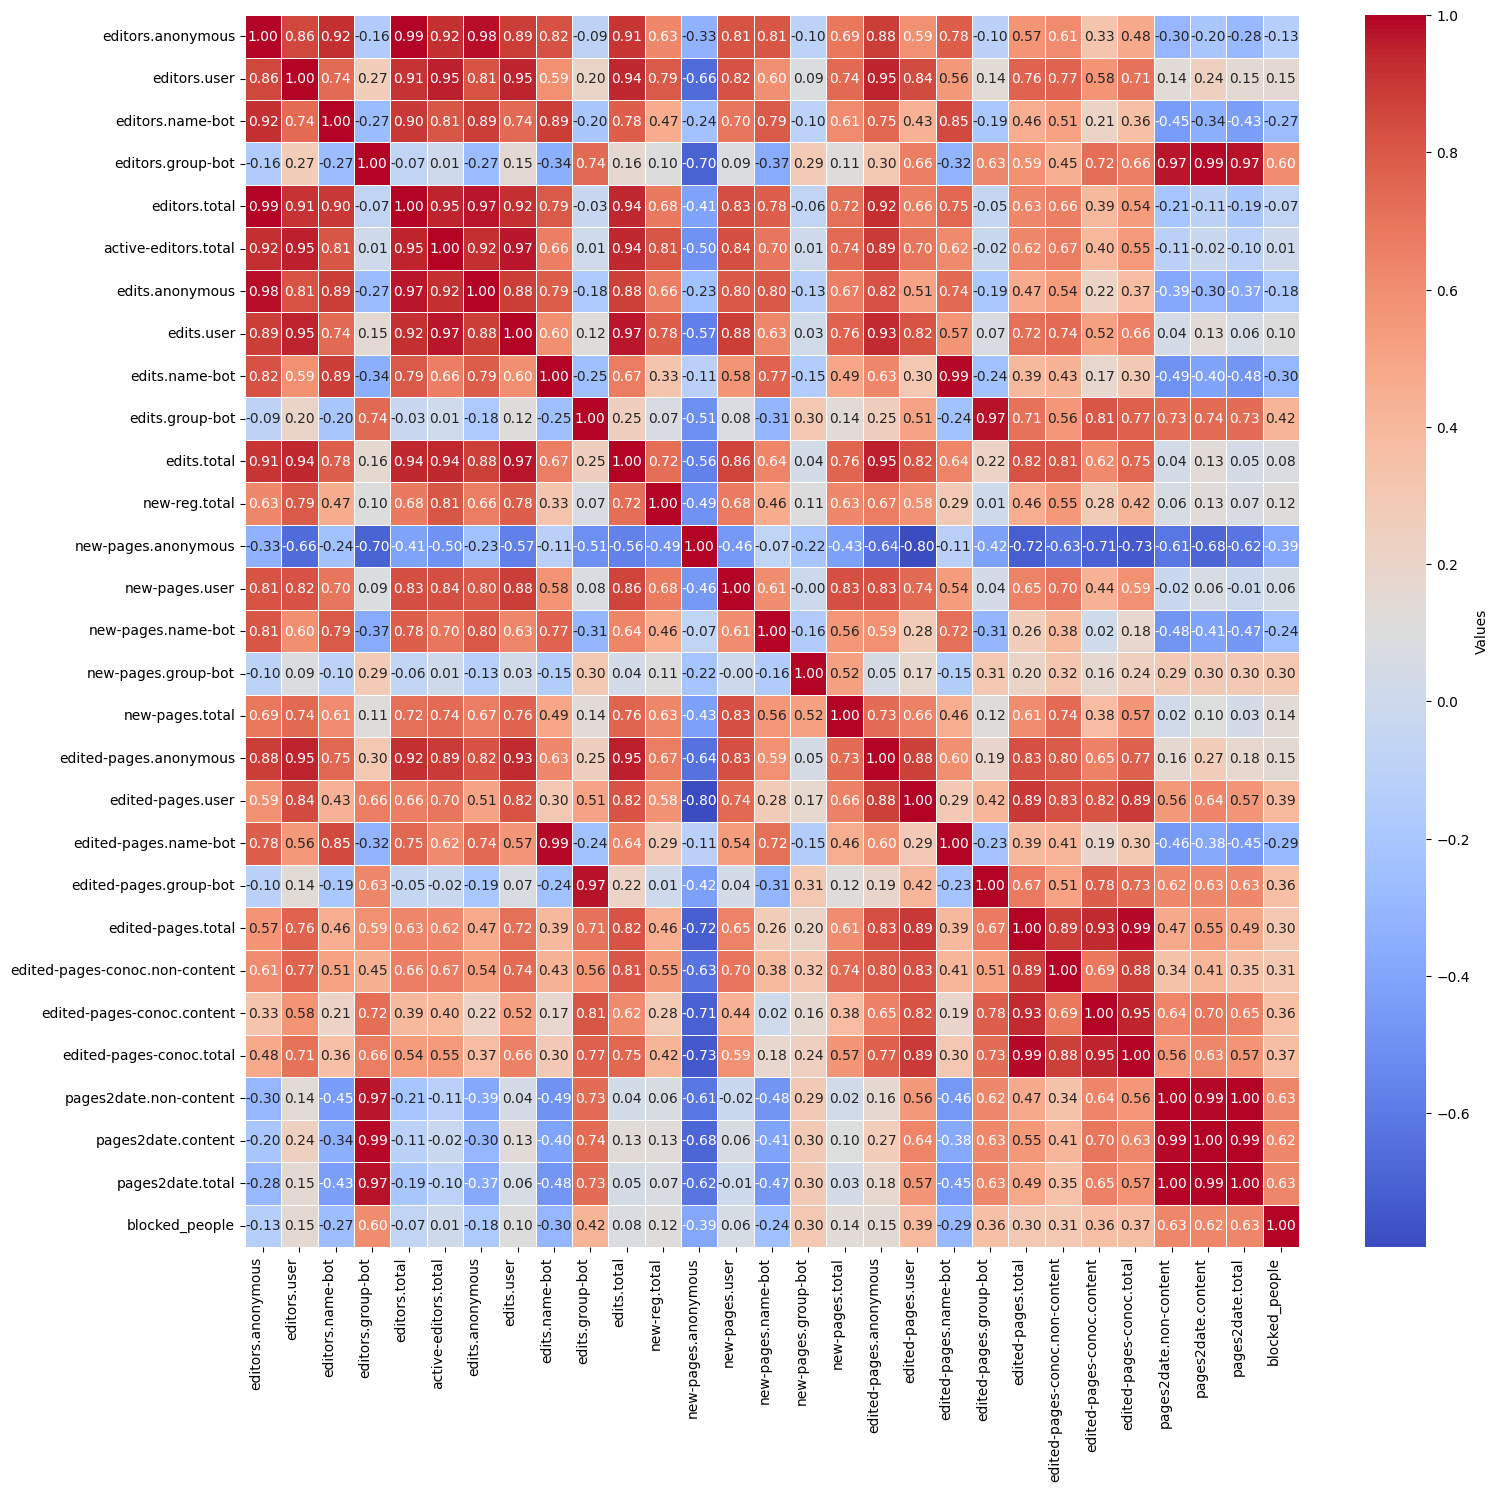

In [60]:
plt.figure(figsize=(17,16))

features = df_merged.corr().columns

# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(df_merged[features].corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Values'})

# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=90, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')
# plt.savefig('heatmap.png')
plt.show()


In [61]:
df_new_pages.shape

(156, 5)

In [62]:
file = '/policy_evolution_3.csv'
df_wikipedia_en_policy = pd.read_csv(folder + file)
print(df_wikipedia_en_policy.shape)
df_wikipedia_en_policy.head()



(228, 2)


,Month,tag_number
0,2005-01-01,26
1,2005-02-01,26
2,2005-03-01,26
3,2005-04-01,26
4,2005-05-01,26


In [63]:
df_wikipedia_en_policy.rename(columns={'Month':'month'}, inplace=True)
df_wikipedia_en_policy.head()

,month,tag_number
0,2005-01-01,26
1,2005-02-01,26
2,2005-03-01,26
3,2005-04-01,26
4,2005-05-01,26


In [64]:
# cleaning month column to have proper format
df_wikipedia_en_policy['month'] = pd.to_datetime(df_wikipedia_en_policy['month'])

print(df_wikipedia_en_policy.shape)

# keeping only values from 2005 and 2017
df_wikipedia_en_policy = df_wikipedia_en_policy[df_wikipedia_en_policy['month'] >= '2005-01-01']
df_wikipedia_en_policy = df_wikipedia_en_policy[df_wikipedia_en_policy['month'] <= '2017-12-31']

# converting back to date format 
df_wikipedia_en_policy['month'] = df_wikipedia_en_policy['month'].dt.date

# resetting the windows so starts at 0
df_wikipedia_en_policy.reset_index(drop=True, inplace=True)

print(df_wikipedia_en_policy.shape)

df_wikipedia_en_policy.head()

# plt.figure(figsize=(10,6))
# plt.plot(df_wikipedia_en_policy['month'],df_wikipedia_en_policy['total.anonymous'])

(228, 2)
(156, 2)


,month,tag_number
0,2005-01-01,26
1,2005-02-01,26
2,2005-03-01,26
3,2005-04-01,26
4,2005-05-01,26


In [65]:
df_merged.head()

,month,editors.anonymous,editors.user,editors.name-bot,editors.group-bot,editors.total,active-editors.total,edits.anonymous,edits.user,edits.name-bot,...,edited-pages.name-bot,edited-pages.group-bot,edited-pages.total,edited-pages-conoc.non-content,edited-pages-conoc.content,edited-pages-conoc.total,pages2date.non-content,pages2date.content,pages2date.total,blocked_people
0,2005-01-01,65476,14694,18.0,2.0,80190.0,6871,199826,594798,1923.0,...,1268.0,2970.0,246754.0,38977,162240,201217,230161,436782,666943,947
1,2005-02-01,60723,15056,28.0,2.0,75809.0,6872,193228,592628,2128.0,...,1538.0,1205.0,246390.0,39771,161811,201582,249240,456399,705639,1207
2,2005-03-01,74055,18243,29.0,2.0,92329.0,8543,242362,770234,9740.0,...,4975.0,1618.0,307065.0,49885,198997,248882,274441,481853,756294,715
3,2005-04-01,92101,21373,31.0,2.0,113507.0,10039,329974,929123,29911.0,...,22458.0,4557.0,376828.0,59181,233517,292698,304580,511374,815954,625
4,2005-05-01,102733,23181,35.0,4.0,125953.0,10911,365311,969462,24931.0,...,18046.0,3975.0,393543.0,62047,245289,307336,333642,541295,874937,590


In [101]:
type(df_merged['month'][0])

datetime.date

## **Part B.1** Section by section relationship analysis

### 1. Relationship between total blocked editors and editors

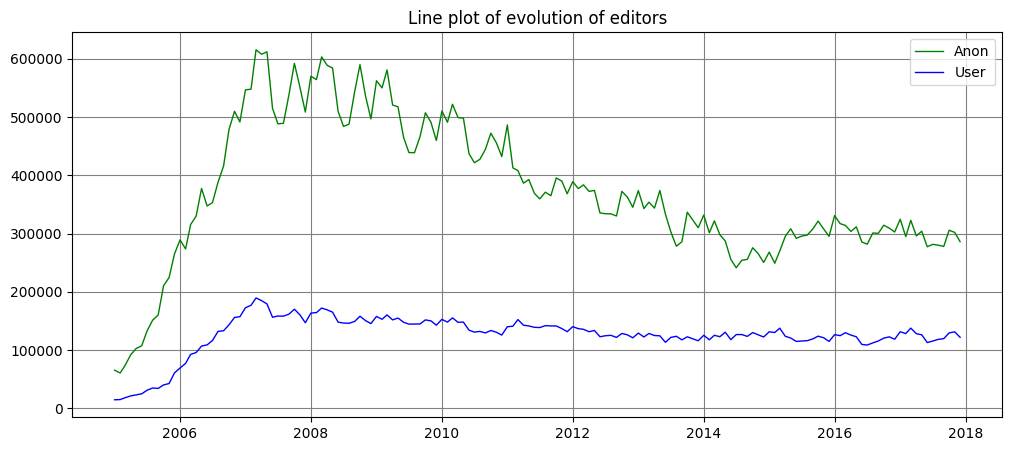

In [67]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Line plot of evolution of editors")
plt.plot(df_merged['month'], editors['editors.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], editors['editors.user'], label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], editors['editors.name-bot'], label = 'Name bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], editors['editors.group-bot'], label= 'group-bot', lw=1.0, color='orange')
# plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
# plt.plot(df_merged['month'], (df_wikipedia_en_policy['tag_number']*2000), label = 'Policies (Cusum)', lw=1.0, color='Magenta')
plt.legend()
plt.show()
# plt.savefig("test1.png")

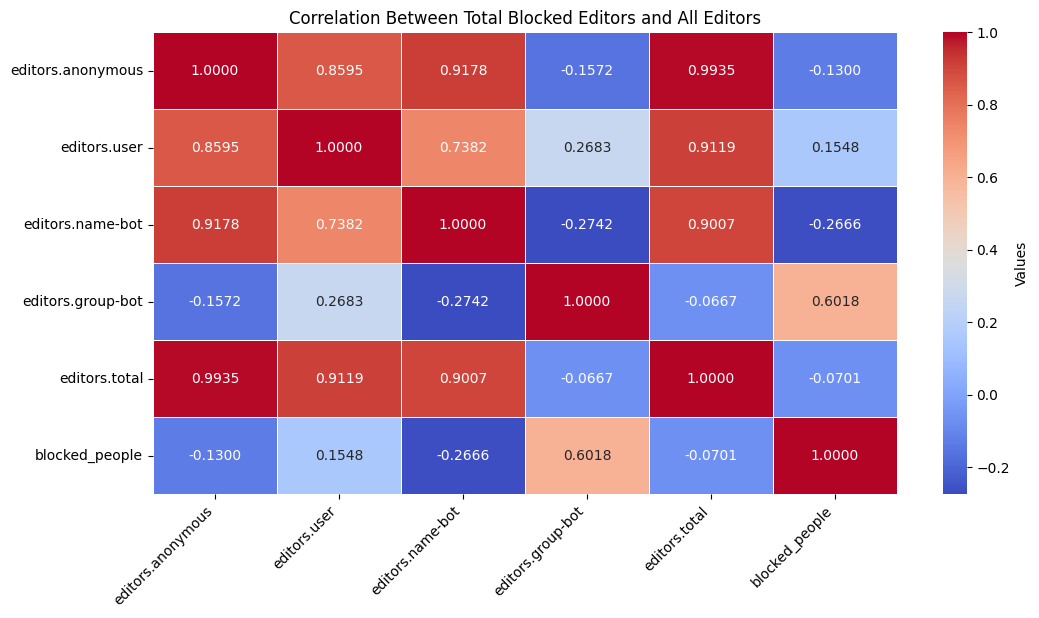

In [68]:
# correlation heatmap

plt.figure(figsize=(12,6))
plt.title("Correlation Between Total Blocked Editors and All Editors")
temp = pd.concat([editors, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')
plt.savefig('heatmap1.png')

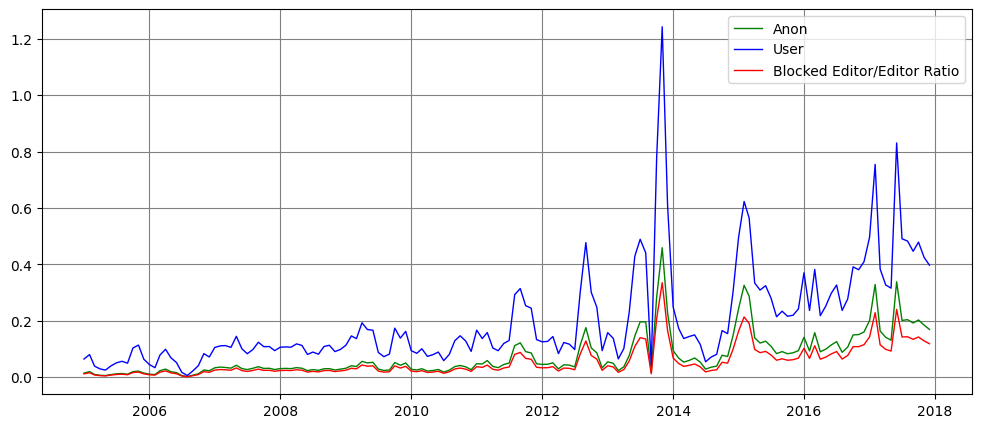

In [69]:
# ratio line plot
plt.figure(figsize=(12,5))

# plt.title("Evolution of Total Blocked People to Editors Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/editors['editors.total']), label= 'Blocked Editor/Editor Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 2. Relationship between total blocked editors and active editors

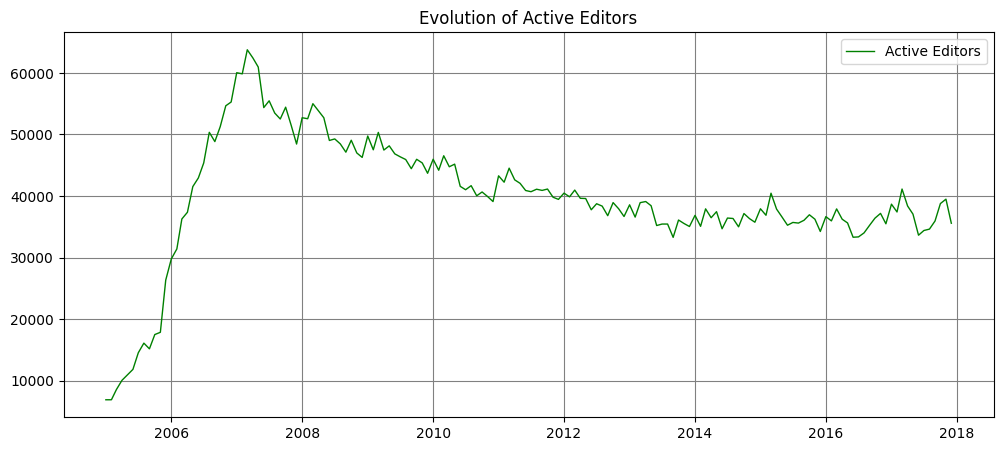

In [70]:
#line plot
plt.figure(figsize=(12,5))
plt.title("Evolution of Active Editors")
plt.plot(df_merged['month'], active_editors['active-editors.total'], label = 'Active Editors', lw=1.0, color='green')
# plt.plot(df_merged['month'], normalized_arr, label = 'Active Editors', lw=1.0, color='green')

plt.legend()
plt.show()

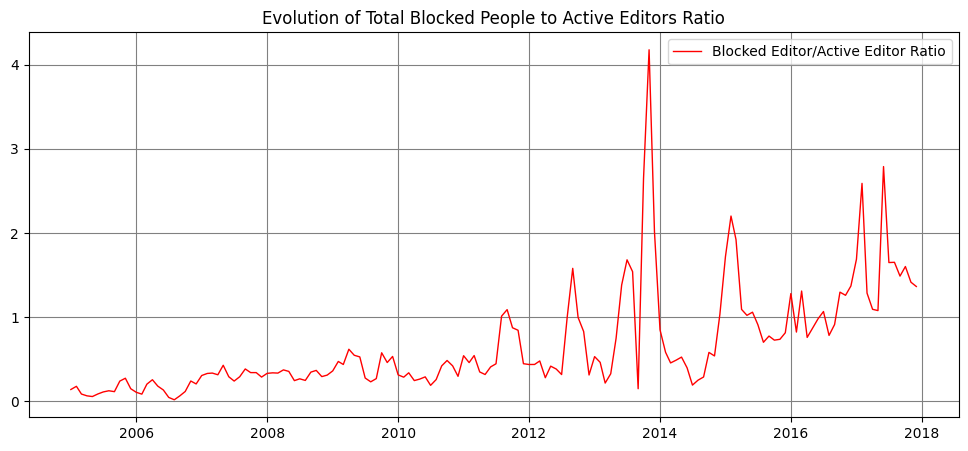

In [71]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to Active Editors Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/active_editors['active-editors.total']), label= 'Blocked Editor/Active Editor Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 3. Relationship between total blocked editors and edits

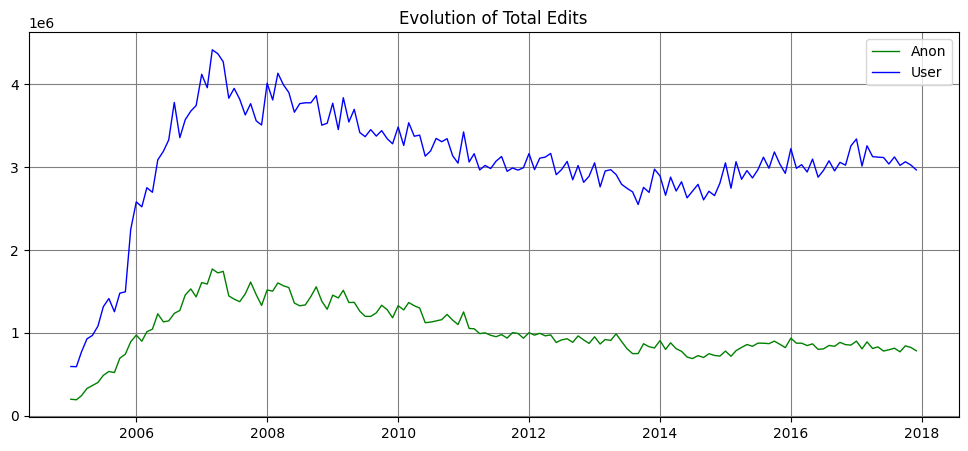

<Figure size 640x480 with 0 Axes>

In [72]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Edits")
plt.plot(df_merged['month'], edits['edits.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], edits['edits.user'], label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], edits['edits.name-bot'], label = 'Name bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], edits['edits.group-bot'], label= 'group-bot', lw=1.0, color='orange')
# plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()
plt.savefig("test2.png")

[Text(0, 0.5, 'edits.anonymous'),
 Text(0, 1.5, 'edits.user'),
 Text(0, 2.5, 'edits.name-bot'),
 Text(0, 3.5, 'edits.group-bot'),
 Text(0, 4.5, 'edits.total'),
 Text(0, 5.5, 'blocked_people')]

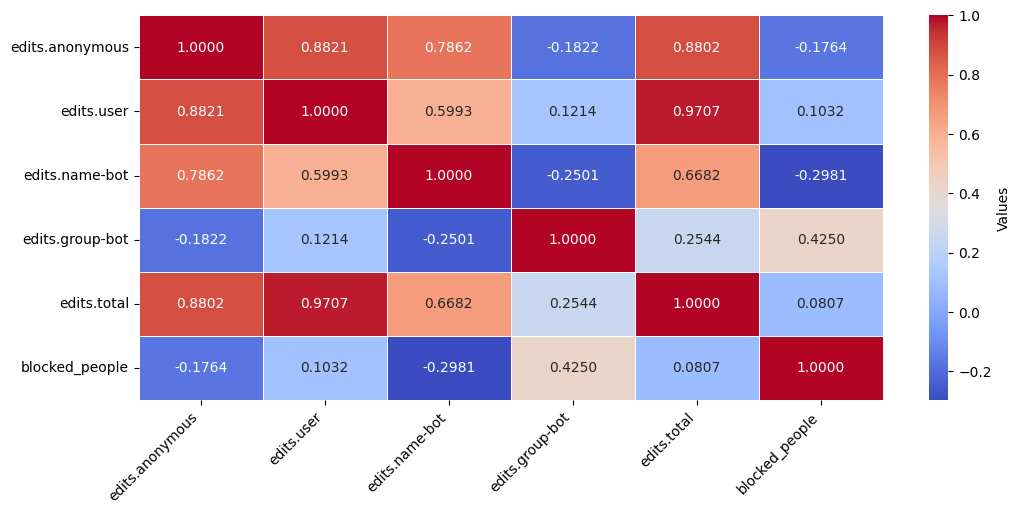

In [73]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edits, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

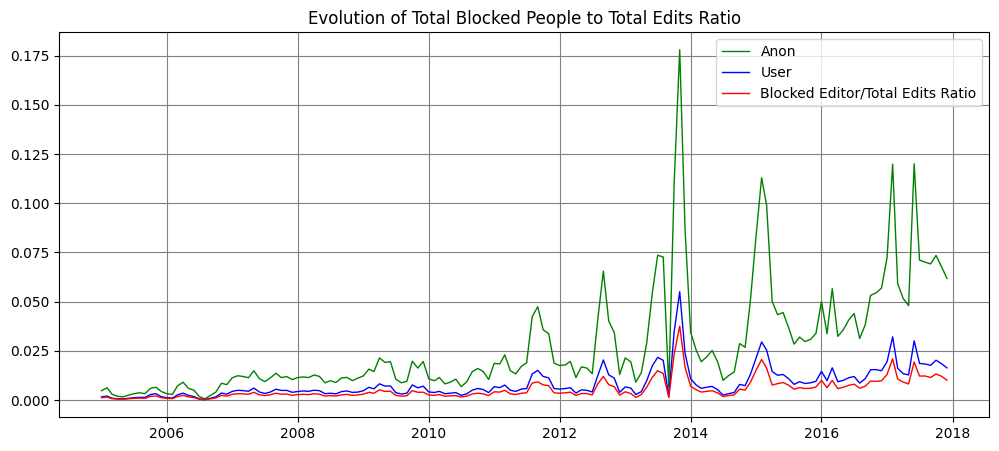

In [74]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to Total Edits Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edits['edits.total']), label= 'Blocked Editor/Total Edits Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 4. Relationship between total blocked editors and new registers

In [75]:
new_reg.columns

Index(['month', 'new-reg.total'], dtype='object')

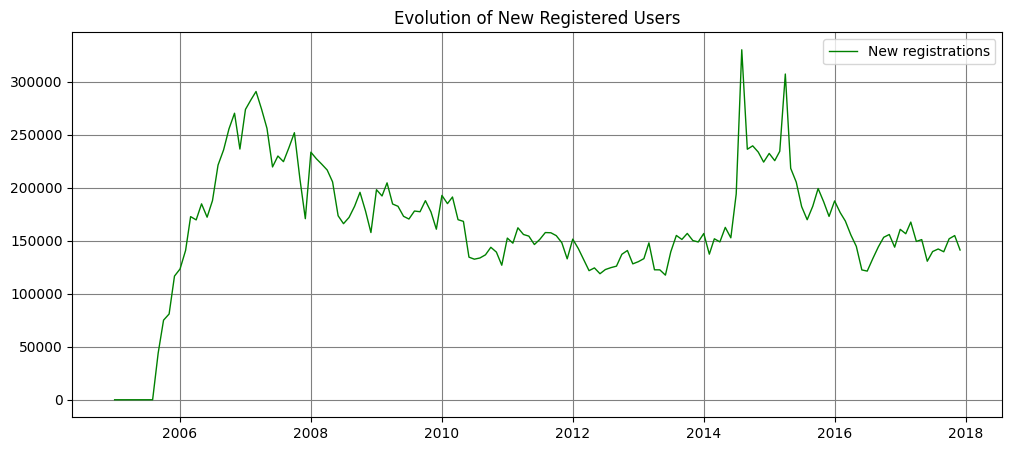

In [76]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of New Registered Users")
plt.plot(df_merged['month'], new_reg['new-reg.total'], label = 'New registrations', lw=1.0, color='green')

plt.legend()
plt.show()

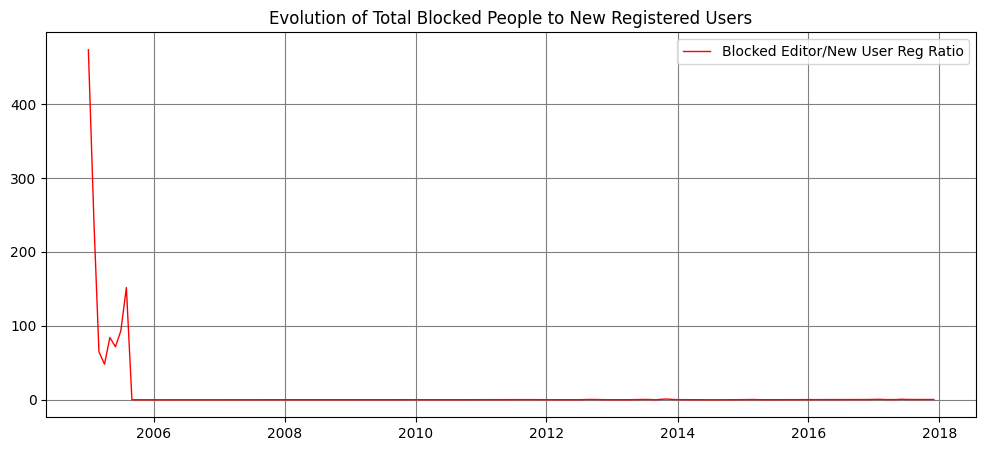

In [77]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to New Registered Users")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_reg['new-reg.total']), label= 'Blocked Editor/New User Reg Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 5. Relationship between total blocked editors and new pages created

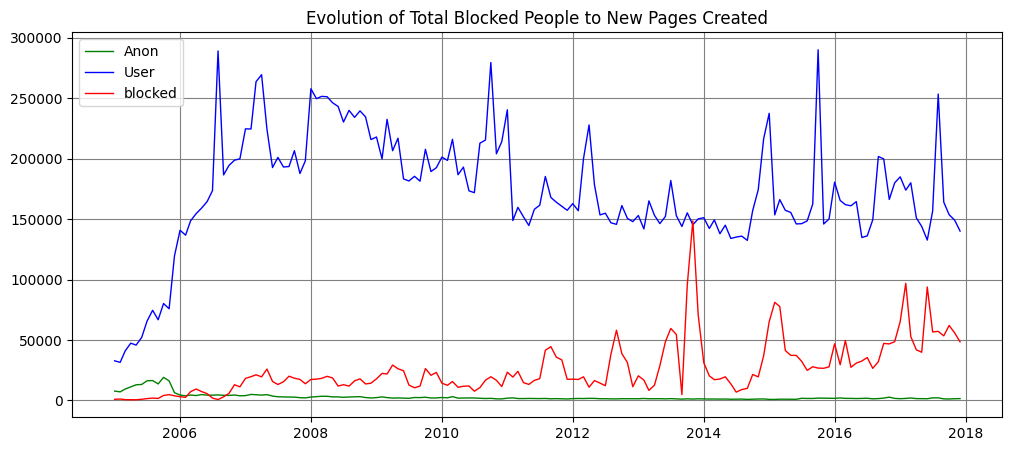

In [78]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to New Pages Created")
plt.plot(df_merged['month'], new_pages['new-pages.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], new_pages['new-pages.user'], label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], new_pages['new-pages.name-bot'], label = 'Name bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], new_pages['new-pages.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'new-pages.anonymous'),
 Text(0, 1.5, 'new-pages.user'),
 Text(0, 2.5, 'new-pages.name-bot'),
 Text(0, 3.5, 'new-pages.group-bot'),
 Text(0, 4.5, 'new-pages.total'),
 Text(0, 5.5, 'blocked_people')]

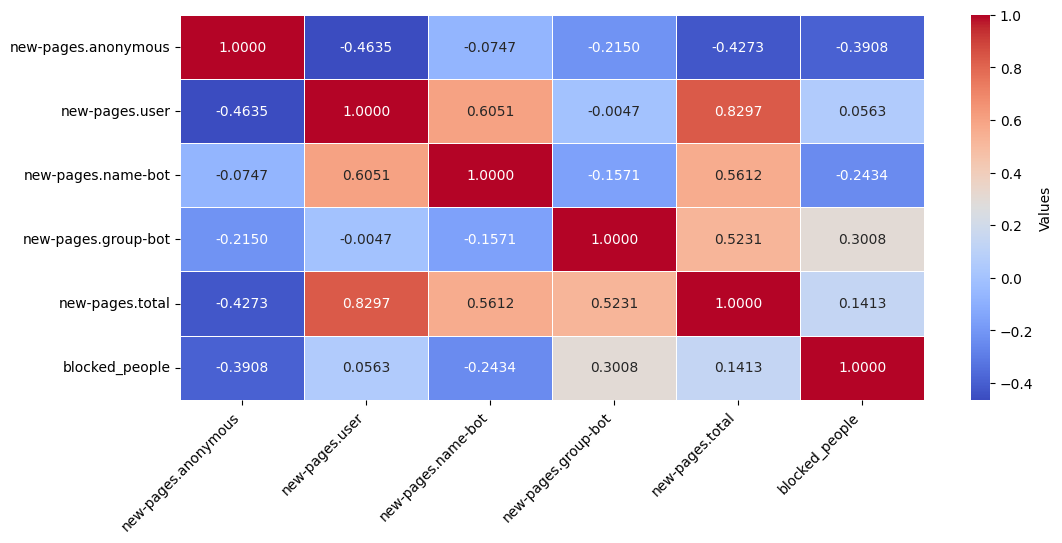

In [79]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([new_pages, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

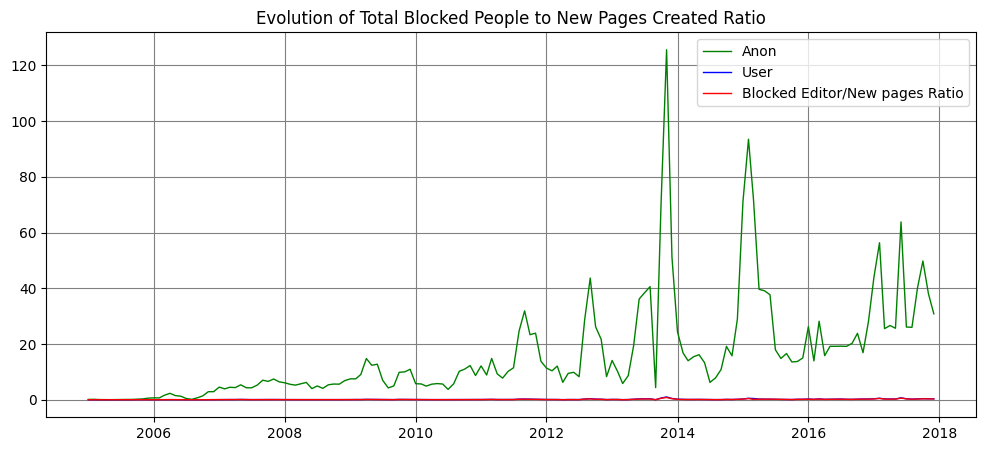

In [80]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to New Pages Created Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/new_pages['new-pages.total']), label= 'Blocked Editor/New pages Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 6. Relationship between total blocked editors and edited pages

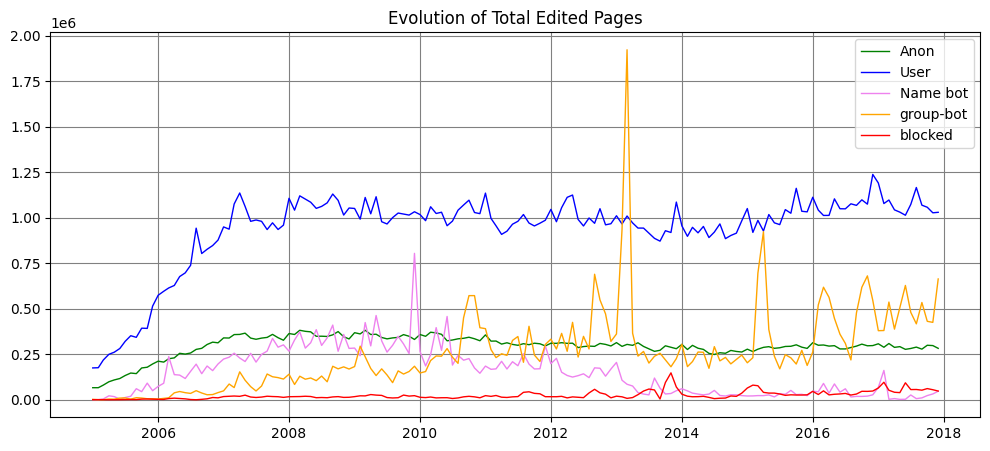

In [81]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Edited Pages")
plt.plot(df_merged['month'], edited_pages['edited-pages.anonymous'], label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], edited_pages['edited-pages.user'], label = 'User', lw=1.0, color='blue')
plt.plot(df_merged['month'], edited_pages['edited-pages.name-bot'], label = 'Name bot', lw=1.0, color='violet')
plt.plot(df_merged['month'], edited_pages['edited-pages.group-bot'], label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'edited-pages.anonymous'),
 Text(0, 1.5, 'edited-pages.user'),
 Text(0, 2.5, 'edited-pages.name-bot'),
 Text(0, 3.5, 'edited-pages.group-bot'),
 Text(0, 4.5, 'edited-pages.total'),
 Text(0, 5.5, 'blocked_people')]

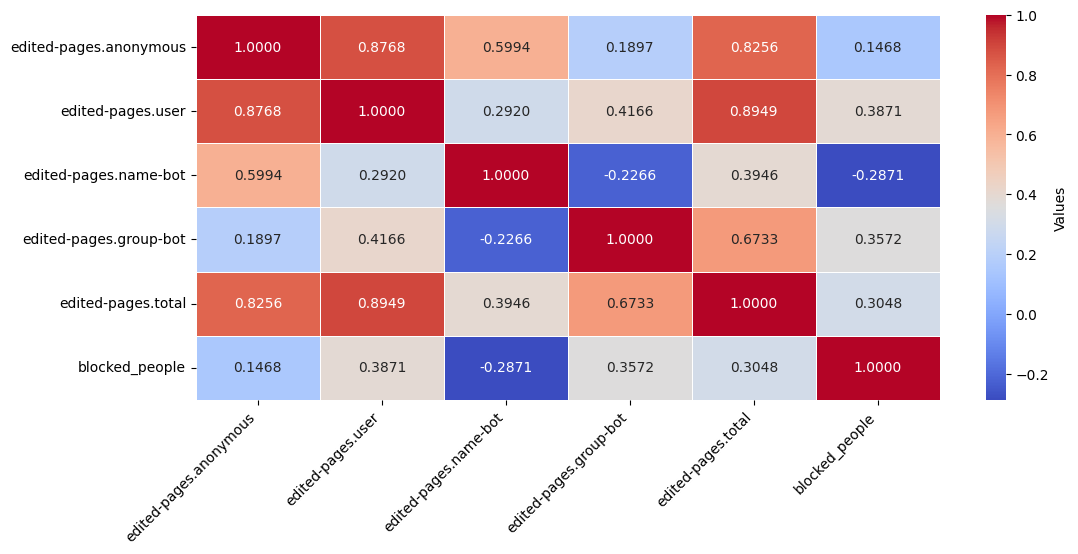

In [82]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edited_pages, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

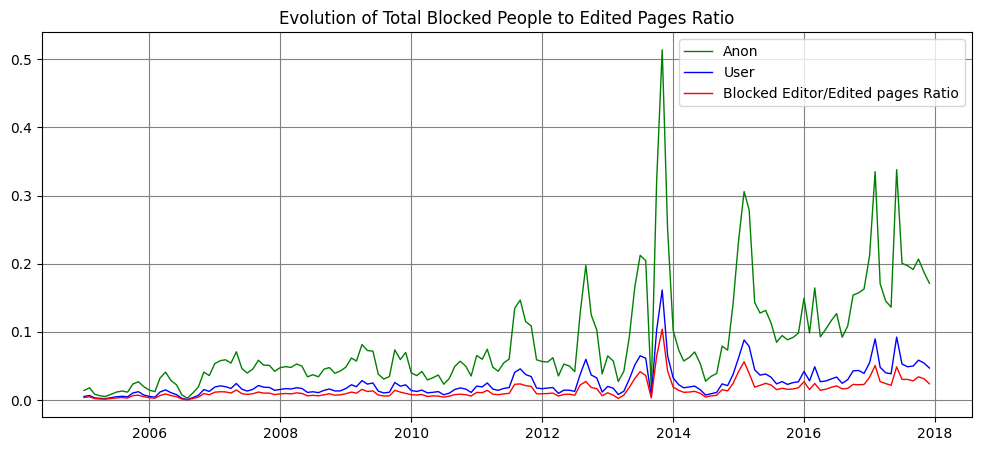

In [83]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to Edited Pages Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.anonymous']),label = 'Anon', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.user']), label = 'User', lw=1.0, color='blue')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.name-bot']), label = 'name-bot', lw=1.0, color='violet')
# plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.group-bot']), label= 'group-bot', lw=1.0, color='orange')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages['edited-pages.total']), label= 'Blocked Editor/Edited pages Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 7. Relationship between total blocked editors and edited pages (content-no content)

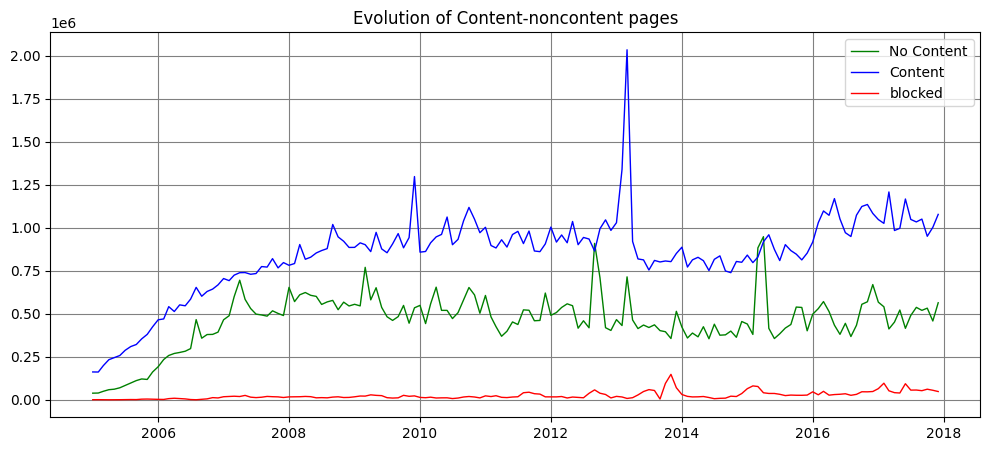

In [84]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Content-noncontent pages")
plt.plot(df_merged['month'], edited_pages_conoc['edited-pages-conoc.non-content'], label = 'No Content', lw=1.0, color='green')
plt.plot(df_merged['month'], edited_pages_conoc['edited-pages-conoc.content'], label = 'Content', lw=1.0, color='blue')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'edited-pages-conoc.non-content'),
 Text(0, 1.5, 'edited-pages-conoc.content'),
 Text(0, 2.5, 'edited-pages-conoc.total'),
 Text(0, 3.5, 'blocked_people')]

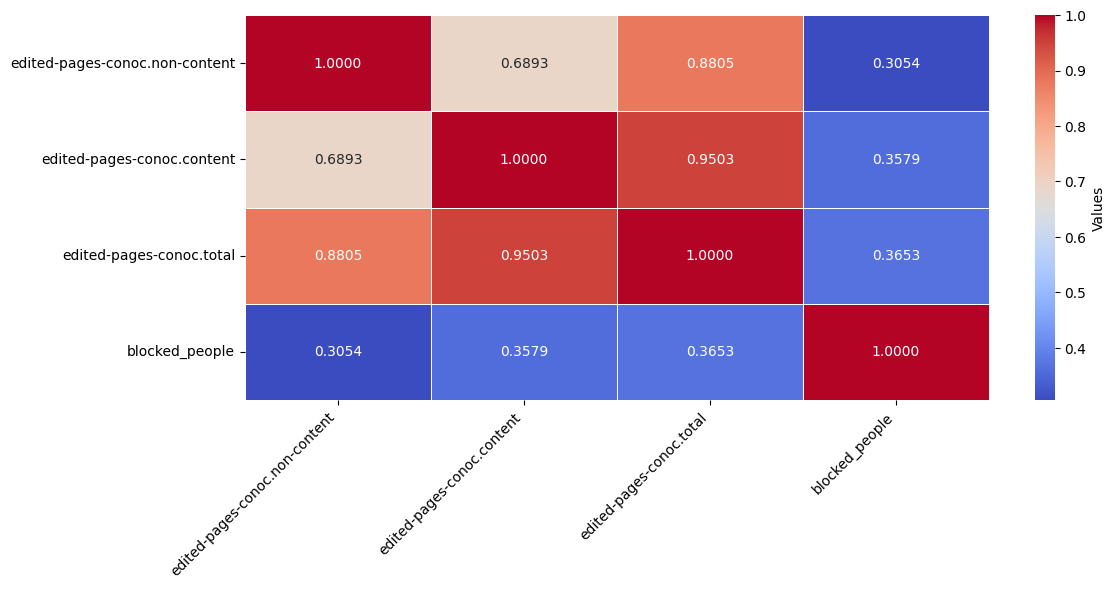

In [85]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([edited_pages_conoc, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

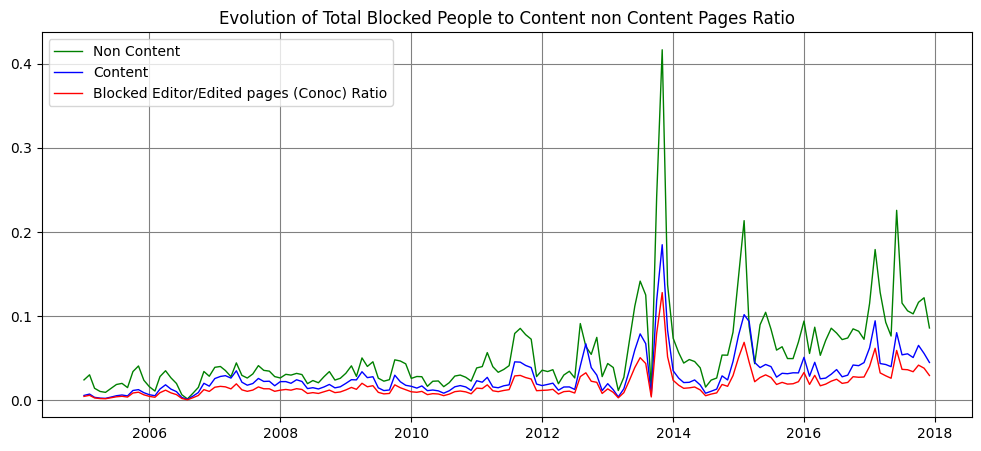

In [86]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Blocked People to Content non Content Pages Ratio")
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.non-content']),label = 'Non Content', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.content']), label = 'Content', lw=1.0, color='blue')

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/edited_pages_conoc['edited-pages-conoc.total']), label= 'Blocked Editor/Edited pages (Conoc) Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

### 8. Relationship between total blocked editors and pages to date (content-no content)

In [87]:
pages2date.columns

Index(['month', 'pages2date.non-content', 'pages2date.content',
       'pages2date.total'],
      dtype='object')

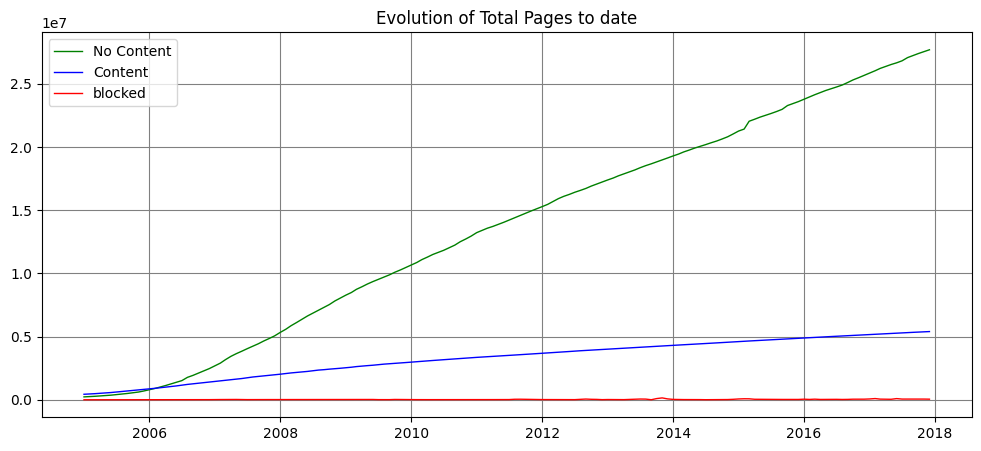

In [88]:
#line plot
plt.figure(figsize=(12,5))

plt.title("Evolution of Total Pages to date")
plt.plot(df_merged['month'], pages2date['pages2date.non-content'], label = 'No Content', lw=1.0, color='green')
plt.plot(df_merged['month'], pages2date['pages2date.content'], label = 'Content', lw=1.0, color='blue')
plt.plot(df_merged['month'], (blocked_account['blocked_people']), label = 'blocked', lw=1.0, color='red')
plt.legend()
plt.show()

[Text(0, 0.5, 'pages2date.non-content'),
 Text(0, 1.5, 'pages2date.content'),
 Text(0, 2.5, 'pages2date.total'),
 Text(0, 3.5, 'blocked_people')]

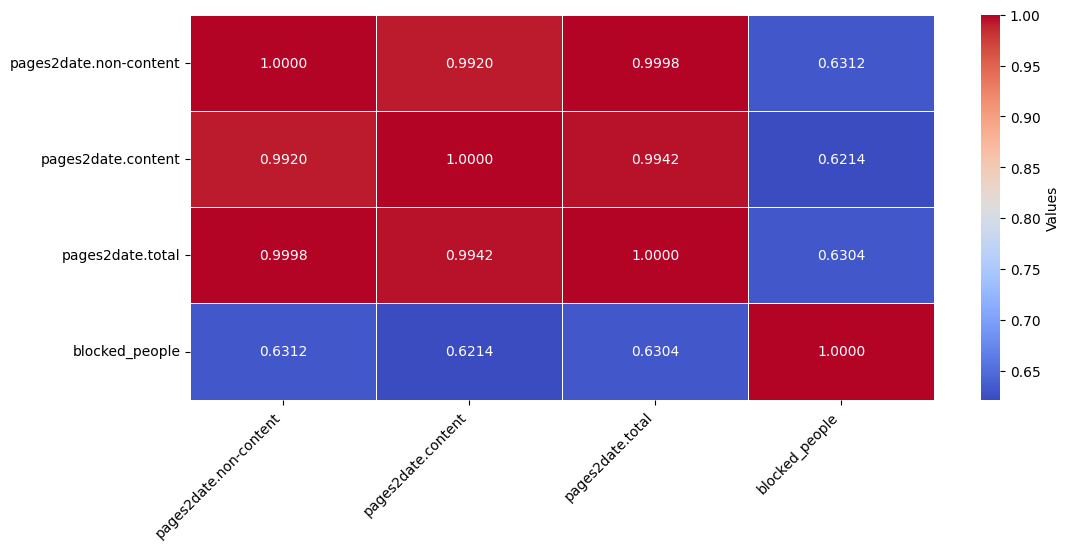

In [89]:
# correlation heatmap

plt.figure(figsize=(12,5))
temp = pd.concat([pages2date, blocked_account], axis=1)
features = temp.corr().columns 
# using seaborn library to visualize the correlation matrix
heatmap = sns.heatmap(temp.corr(), cmap='coolwarm', annot=True, fmt='.4f', linewidths=0.5, cbar_kws={'label': 'Values'})
# customizing heatmap
labels = features
heatmap.set_xticklabels(labels, rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(labels, rotation=0, horizontalalignment='right')

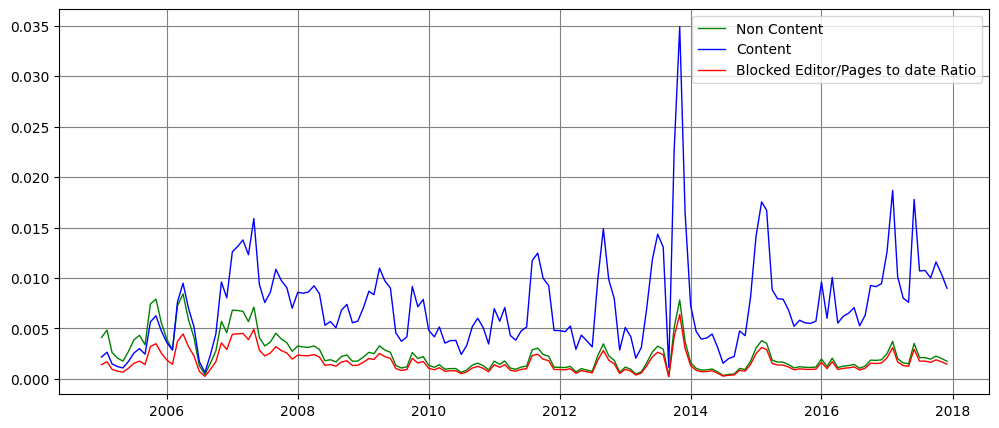

In [90]:
# ratio line plot
plt.figure(figsize=(12,5))

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.non-content']),label = 'Non Content', lw=1.0, color='green')
plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.content']), label = 'Content', lw=1.0, color='blue')

plt.plot(df_merged['month'], ((blocked_account['blocked_people'])/pages2date['pages2date.total']), label= 'Blocked Editor/Pages to date Ratio', lw=1.0, color='red')

plt.legend()
plt.show()

## **Part B.2:**

In [91]:
edited_pages.columns

Index(['month', 'edited-pages.anonymous', 'edited-pages.user',
       'edited-pages.name-bot', 'edited-pages.group-bot',
       'edited-pages.total'],
      dtype='object')

### Procressing the evolution timeline

In [92]:
# editors anon 
A = np.array(editors['editors.anonymous'])
A = preprocessing.normalize([A], norm='max')
A = A.transpose()

# editors user
B = np.array(editors['editors.user'])
B = preprocessing.normalize([B], norm='max')
B = B.transpose()

# active editors
C = np.array(active_editors['active-editors.total'])
C = preprocessing.normalize([C], norm='max')
C = C.transpose()

# anon. edits
D = np.array(edits['edits.anonymous'])
D = preprocessing.normalize([D], norm='max')
D = D.transpose()

# user edits
E = np.array(edits['edits.user'])
E = preprocessing.normalize([E], norm='max')
E = E.transpose()

# new registered users
F = np.array(new_reg['new-reg.total'])
F = preprocessing.normalize([F], norm='max')
F = F.transpose()

# # 
# F = np.array(new_pages['new-pages.anonymous'])
# F = preprocessing.normalize([F], norm='max')
# F = F.transpose()

# # blocks to user new page creations
# G = np.array(new_pages['new-pages.user'])
# G = preprocessing.normalize([G], norm='max')
# G = G.transpose()

# blocks to anon. new page edits
H = np.array(edited_pages['edited-pages.anonymous'])
H = preprocessing.normalize([H], norm='max')
H = H.transpose()

# blocks to user new page edits
I = np.array(edited_pages['edited-pages.user'])
I = preprocessing.normalize([I], norm='max')
I = I.transpose()

# total policies
J = np.array(df_wikipedia_en_policy['tag_number'])
J = preprocessing.normalize([J], norm='max')
J = J.transpose()

# blocked people 
L = np.array(blocked_account['blocked_people'])
L = preprocessing.normalize([L], norm='max')
L = L.transpose()

# plt.plot(df_merged['month'], (df_wikipedia_en_policy['tag_number']*2000), label = 'Policies (Cusum)', lw=1.0, color='Magenta')


### Policy vs Editors

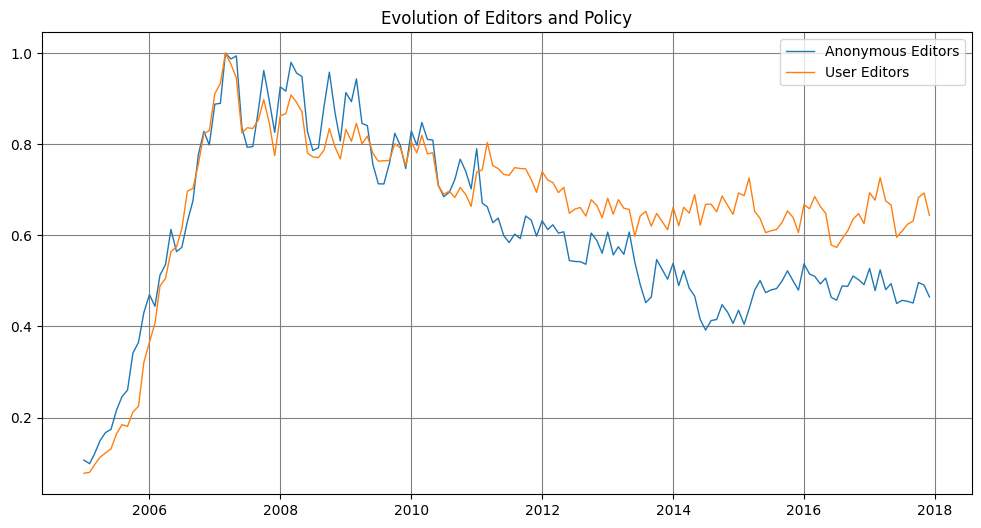

In [93]:
plt.figure(figsize=(12,6))

plt.title("Evolution of Editors and Policy")
plt.plot(df_merged['month'], A, lw=1.0, label = 'Anonymous Editors')
plt.plot(df_merged['month'], B, lw=1.0, label = 'User Editors')

# plt.plot(df_merged['month'], C, lw=1.0, label = 'Active Editors')
# plt.plot(df_merged['month'], (L/B)/2.0, lw=1.0, label = 'Blocked People', color = 'blue', marker='o', alpha =0.6)
# plt.plot(df_merged['month'], J, color = 'red', marker='X', lw=1.0, alpha=0.6, label='Policies')
plt.legend()


### Policy vs edits

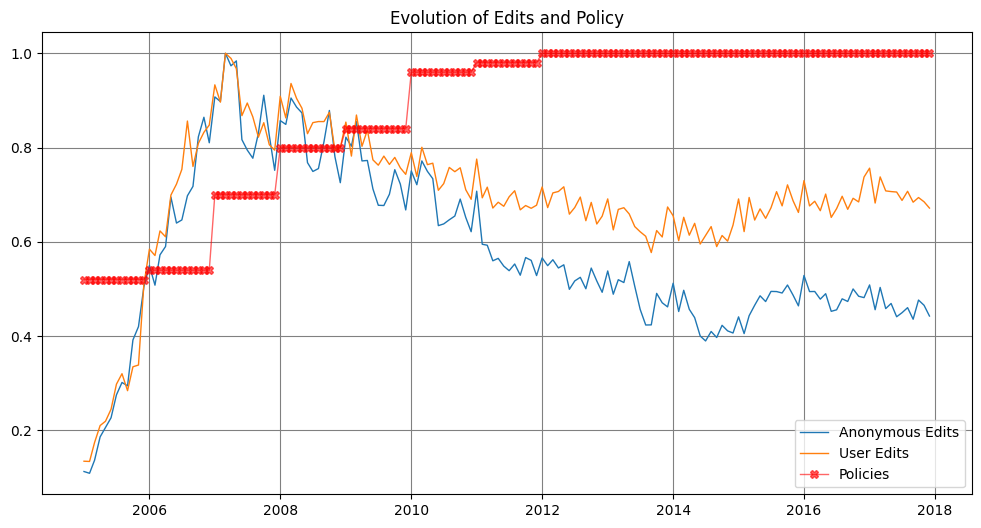

In [94]:
plt.figure(figsize=(12,6))

plt.title("Evolution of Edits and Policy")
plt.plot(df_merged['month'], D, lw=1.0, label = 'Anonymous Edits')
plt.plot(df_merged['month'], E, lw=1.0, label = 'User Edits')
# plt.plot(df_merged['month'], L, lw=1.0, label = 'Blocked People', color = 'blue', marker='o', alpha =0.6)
plt.plot(df_merged['month'], J, color = 'red', marker='X', lw=1.0, alpha=0.6, label='Policies')
plt.legend()


### Policy vs New User Registration

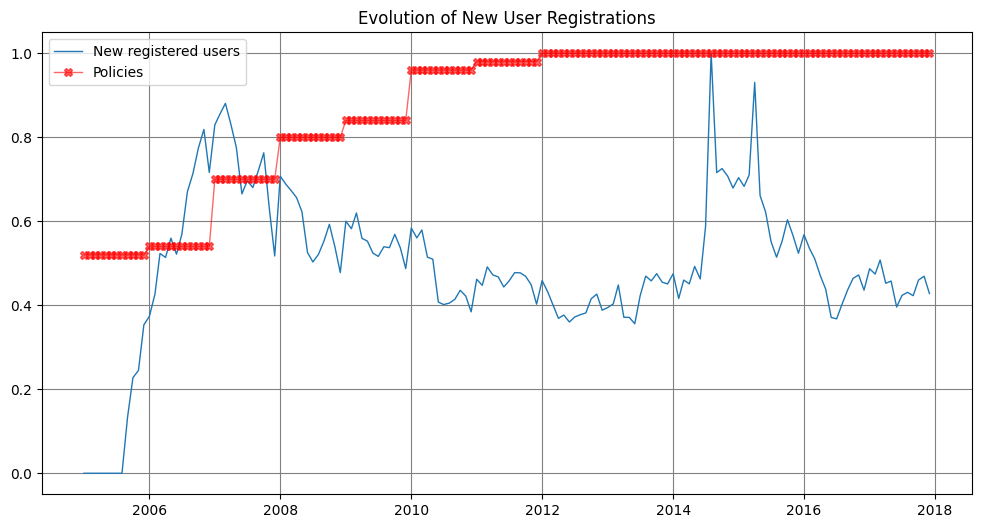

In [95]:
plt.figure(figsize=(12,6))

plt.title("Evolution of New User Registrations")
plt.plot(df_merged['month'], F, lw=1.0, label = 'New registered users')

# plt.plot(df_merged['month'], L, lw=1.0, label = 'Blocked People', color = 'blue', marker='o', alpha =0.6)
plt.plot(df_merged['month'], J, color = 'red', marker='X', lw=1.0, alpha=0.6, label='Policies')
plt.legend()


### Policy vs Page Edits

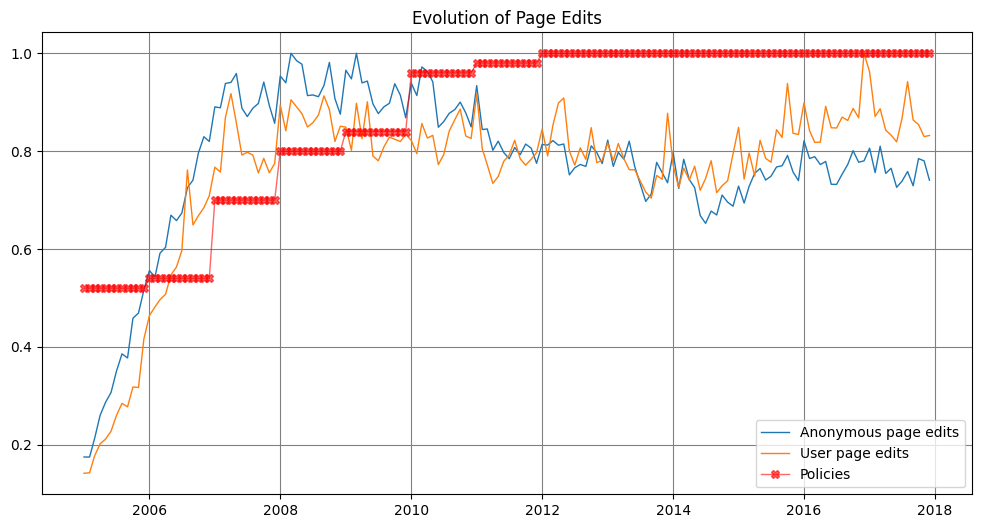

In [96]:
plt.figure(figsize=(12,6))

plt.title("Evolution of Page Edits")
plt.plot(df_merged['month'], H, lw=1.0, label = 'Anonymous page edits')
plt.plot(df_merged['month'], I, lw=1.0, label = 'User page edits')

# plt.plot(df_merged['month'], L, lw=1.0, label = 'Blocked People', color = 'blue', marker='o', alpha =0.6)
plt.plot(df_merged['month'], J, color = 'red', marker='X', lw=1.0, alpha=0.6, label='Policies')
plt.legend()


### Policy vs Blocked Total

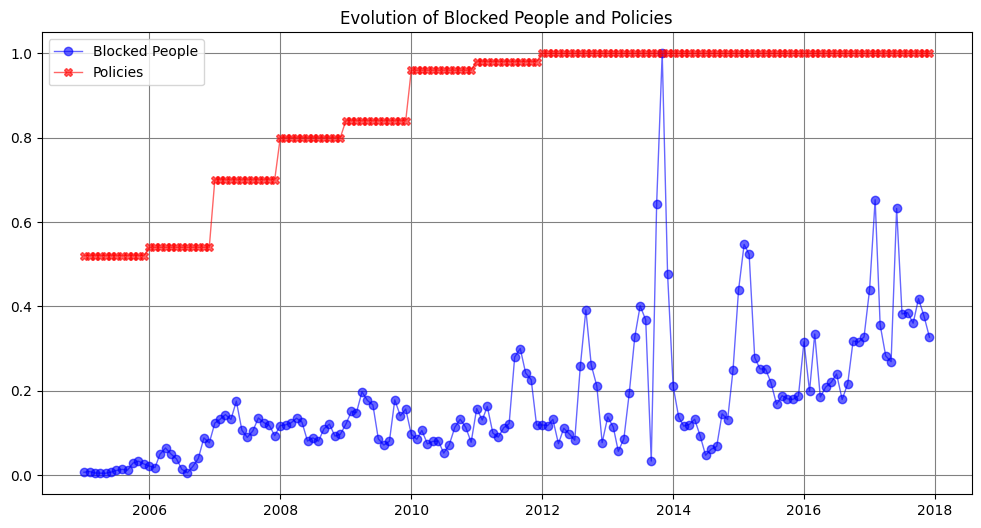

In [97]:
plt.figure(figsize=(12,6))

plt.title("Evolution of Blocked People and Policies")
# plt.plot(df_merged['month'], H, lw=1.0, label = 'Anonymous page edits')
# plt.plot(df_merged['month'], I, lw=1.0, label = 'User page edits')

plt.plot(df_merged['month'], L, lw=1.0, label = 'Blocked People', color = 'blue', marker='o', alpha =0.6)
plt.plot(df_merged['month'], J, color = 'red', marker='X', lw=1.0, alpha=0.6, label='Policies')
plt.legend()


## Analysis Later

In [98]:
# # blocked to anon. editros
# A = np.array(blocked_account['blocked_people']/editors['editors.anonymous'])
# A = preprocessing.normalize([A], norm='max')
# A = A.transpose()

# # blocked to user editors
# B = np.array(blocked_account['blocked_people']/editors['editors.user'])
# B = preprocessing.normalize([B], norm='max')
# B = B.transpose()

# # blocked to active editors
# C = np.array(blocked_account['blocked_people']/active_editors['active-editors.total'])
# C = preprocessing.normalize([C], norm='max')
# C = C.transpose()

# # blocks to anon. edits
# D = np.array(blocked_account['blocked_people']/edits['edits.anonymous'])
# D = preprocessing.normalize([D], norm='max')
# D = D.transpose()

# # blocks to user edits
# E = np.array(blocked_account['blocked_people']/edits['edits.user'])
# E = preprocessing.normalize([E], norm='max')
# E = E.transpose()

# # blocks to anon. new page creations
# F = np.array(blocked_account['blocked_people']/new_pages['new-pages.anonymous'])
# F = preprocessing.normalize([F], norm='max')
# F = F.transpose()

# # blocks to user new page creations
# G = np.array(blocked_account['blocked_people']/new_pages['new-pages.user'])
# G = preprocessing.normalize([G], norm='max')
# G = G.transpose()

# # blocks to anon. new page edits
# H = np.array(blocked_account['blocked_people']/edited_pages['edited-pages.anonymous'])
# H = preprocessing.normalize([H], norm='max')
# H = H.transpose()

# # blocks to user new page edits
# I = np.array(blocked_account['blocked_people']/edited_pages['edited-pages.user'])
# I = preprocessing.normalize([I], norm='max')
# I = I.transpose()

# J = np.array(df_wikipedia_en_policy['tag_number'])
# J = preprocessing.normalize([J], norm='max')
# J = J.transpose()

# # plt.plot(df_merged['month'], (df_wikipedia_en_policy['tag_number']*2000), label = 'Policies (Cusum)', lw=1.0, color='Magenta')


In [99]:
# plt.figure(figsize=(12,6))

# plt.plot(df_merged['month'], A)
# plt.plot(df_merged['month'], B)
# plt.plot(df_merged['month'], C)
# plt.plot(df_merged['month'], D)
# plt.plot(df_merged['month'], E)
# plt.plot(df_merged['month'], F)
# plt.plot(df_merged['month'], G) 
# plt.plot(df_merged['month'], H)
# plt.plot(df_merged['month'], I)
# plt.plot(df_merged['month'], J)


In [100]:
interaction_score = A+B+C+D+E+F+G+H+I
plt.plot(df_merged['month'], interaction_score)

NameError: name 'G' is not defined